In [88]:
import numpy as np
import scipy as sp
from scipy import *
from scipy.linalg import *
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt

# 1. Scipy

# a)

In [31]:
A = np.array([[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9]])

# b)

In [32]:
b = np.array([1, 2, 3])

# c)

In [33]:
x = sp.linalg.solve(A, b)
x

/home/slon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: LinAlgWarning: Ill-conditioned matrix (rcond=2.20282e-18): result may not be accurate.
  """Entry point for launching an IPython kernel.


array([-0.23333333,  0.46666667,  0.1       ])

# d)

In [34]:
np.matmul(A,x)

array([1., 2., 3.])

# e) and g)

In [43]:
B = sp.rand(3,3)
np.round(B,3)

array([[0.277, 0.065, 0.021],
       [0.552, 0.346, 0.649],
       [0.194, 0.653, 0.368]])

In [44]:
X = sp.linalg.solve(A,B)
X

/home/slon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: LinAlgWarning: Ill-conditioned matrix (rcond=2.20282e-18): result may not be accurate.
  """Entry point for launching an IPython kernel.


array([[-1.99472852e+15,  8.21034807e+13, -2.86631133e+15],
       [ 3.98945704e+15, -1.64206961e+14,  5.73262265e+15],
       [-1.99472852e+15,  8.21034807e+13, -2.86631133e+15]])

In [52]:
print('A*X = ',np.matmul(A,X))
print('Matrix A has a zero detemninant hence it is singular and we can not solve the equatin')
print('Determinant A:' ,det(A))

A*X =  [[-0.5     0.0625  0.5   ]
 [ 1.      0.375  -1.    ]
 [ 0.5     0.625   1.5   ]]
Matrix A has a zero detemninant hence it is singular and we can not solve the equatin
Determinant A: 0.0


In [53]:
print('Inverse A')
inv(A)

Inverse A


array([[ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15],
       [-6.30503948e+15,  1.26100790e+16, -6.30503948e+15],
       [ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15]])

# f)

In [59]:
evals, evecs = eig(A)
print('Eigenvalues: ','\n', evals,'\n')
print('Eigenvectors: ','\n',evecs)

Eigenvalues:  
 [ 1.61168440e+01+0.j -1.11684397e+00+0.j -9.75918483e-16+0.j] 

Eigenvectors:  
 [[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


# h)

In [83]:
norm_A_1 = norm(A, 1)
print(norm_A_1)
norm_A_inf = norm(A, Inf)
print(norm_A_inf)

18.0
24.0


# Statistics

# a)

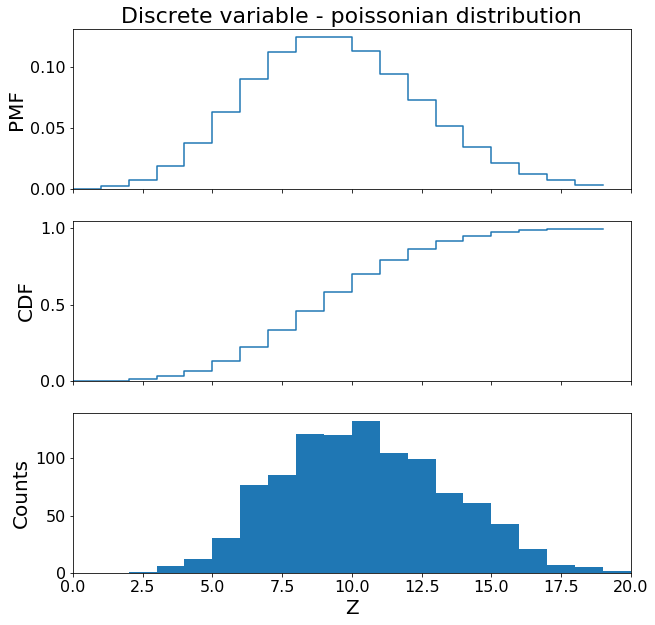

In [133]:
mu = 10
n =  arange(0,20)
Z = stats.poisson(mu) 

fig, axes = plt.subplots(3,1, sharex=True, figsize=(10,10))
fs = 18
# probability mass function (PMF)
axes[0].step(n, Z.pmf(n))

# commulative distribution function (CDF)
axes[1].step(n, Z.cdf(n))

# histogram of 1000 random realizations of the variable
axes[2].hist(Z.rvs(size=1000), bins = 20)

axes[2].set_xlabel('Z', fontsize=fs+2)
axes[0].set_ylabel('PMF', fontsize=fs+2)
axes[1].set_ylabel('CDF', fontsize=fs+2)
axes[2].set_ylabel('Counts', fontsize=fs+2)
axes[0].set_title('Discrete variable - poissonian distribution', fontsize=fs+4)

for ax in axes:
    ax.set_ylim(0,)
    ax.set_xlim(0,20)
    ax.tick_params(axis='x', labelsize=fs-2)
    ax.tick_params(axis='y', labelsize=fs-2)

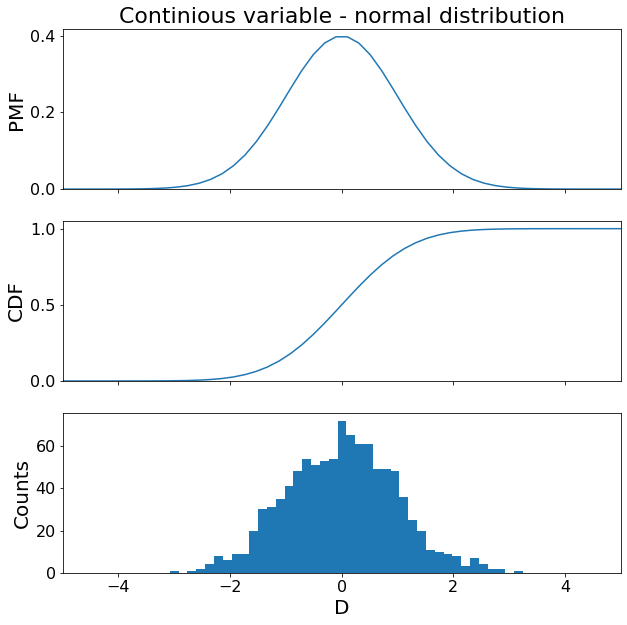

In [142]:
D = stats.norm()
x = linspace(-5,5,50)

fig, axes = plt.subplots(3,1, sharex=True, figsize=(10,10))

# probability distribution function
axes[0].plot(x, D.pdf(x))
# commulative distributin function
axes[1].plot(x, D.cdf(x));
# histogram 
axes[2].hist(D.rvs(size=1000), bins=40)



axes[2].set_xlabel('D', fontsize=fs+2)
axes[0].set_ylabel('PMF', fontsize=fs+2)
axes[1].set_ylabel('CDF', fontsize=fs+2)
axes[2].set_ylabel('Counts', fontsize=fs+2)
axes[0].set_title('Continious variable - normal distribution', fontsize=fs+4)

for ax in axes:
    ax.set_ylim(0,)
    ax.set_xlim(-5,5)
    ax.tick_params(axis='x', labelsize=fs-2)
    ax.tick_params(axis='y', labelsize=fs-2)


# c)

In [143]:
t_stat, p_val = stats.ttest_ind(D.rvs(size=10000), D.rvs(size=10000))

print("The t-statistic =", t_stat)
print("The p-value =", p_val)

The t-statistic = 0.08658761290410771
The p-value = 0.9310001792750802


We can not say if the data come from the same distribution because of very large p value.